# Data parsing
We desided to parse reviews about the app we have chosen from google play. For that we used an open-source library google_play_scraper.

In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
chosen_app = 'com.fantome.penguinisle'

In [4]:
from google_play_scraper import Sort, reviews_all


result = reviews_all(
    chosen_app,
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [5]:
df = pd.DataFrame(np.array(result),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0d048acb-41c5-42d2-ac4a-279ae4cbc189,Adreian Vila,https://play-lh.googleusercontent.com/a-/AD5-W...,"It's fine so far, except the part where when y...",4,0,1.54.1,2022-12-11 22:56:48,None,NaT
1,b9f47cd8-0003-42a5-946f-802dbaa9363a,Elizabeth Lara,https://play-lh.googleusercontent.com/a-/AD5-W...,A cute and relaxing game. But my workshop and ...,4,0,1.54.0,2022-12-11 17:37:27,None,NaT
2,89e15b4c-e360-4aa3-86ad-9ffca28ab59e,Suhan Kumar Choudhury,https://play-lh.googleusercontent.com/a/AEdFTp...,This game I what I always searched for a peace...,5,0,1.54.1,2022-12-11 15:57:02,None,NaT
3,053f630b-ffbc-4b27-9ce5-5933779cf683,Roman Krow,https://play-lh.googleusercontent.com/a-/AD5-W...,So cute!,5,0,1.54.1,2022-12-11 12:07:07,None,NaT
4,953a1057-e2e9-4454-8bc6-4e520011e5ec,Ben Rogers,https://play-lh.googleusercontent.com/a-/AD5-W...,Cute,5,0,1.54.1,2022-12-10 20:22:21,None,NaT
...,...,...,...,...,...,...,...,...,...,...
23368,6aa39abd-bbdf-423f-ba49-fa237310d3d9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Amazing game 10/10,5,1,1.02,2019-08-31 18:41:05,None,NaT
23369,ca863595-0dd0-4cfb-8db0-b454f1d17f9b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Relaxing and cute game,5,1,1.02,2019-08-31 02:16:49,None,NaT
23370,2dbe7036-a02b-456d-bbda-782423653ba4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love penguins.,5,0,1.02,2019-08-30 23:00:33,None,NaT
23371,7d341861-46bd-4e8d-b0e6-b2780d5b8fb1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very cute and very relaxing. The auto function...,5,3,1.02,2019-08-30 12:56:52,None,NaT


In [6]:
df.to_csv('parsed_reviews.csv')

# Data Preprocessing

In [7]:
info = app(chosen_app, lang='en', country='us')
del info['comments']
info

{'title': 'Penguin Isle',
 'description': '<b>Raise your Penguin Isle</b>. Collect a variety of penguins by creating each their own habitat.\r\nCute and adorable penguins are waiting for you.\r\n\r\nEnjoy the waves with relaxing music.\r\n\r\n\r\nGame Features\r\n\r\n- A variety of Penguins and Arctic animals\r\n- Idle gameplay which helps you relax and heals\r\n- Decorate using different themes with 300+ decorations\r\n- Mini Game for extra FUN!\r\n- Dress up your Penguin in your own stylish way\r\n- Cute animal animations\r\n- Beautiful polar scenery \r\n- Comforting melody and the sound of waves\r\n\r\n\r\n**************\r\nContact us at\r\npenguinisle@habby.com\r\n\r\nFacebook: https://www.facebook.com/penguinisle\r\nInstagram: @penguinsisle\r\n**************',
 'descriptionHTML': '<b>Raise your Penguin Isle</b>. Collect a variety of penguins by creating each their own habitat.<br>Cute and adorable penguins are waiting for you.<br><br>Enjoy the waves with relaxing music.<br><br><br

We have received the following parameters of app's reviews:
- at - review date 
- content - review text translated to English
- score - review or product rating out of 5 
- userName - author account name
- table info - info about the product 


The dates are sometimes Nan, so we've decided to replace them with the mean value of the dates

In [8]:
mean_value = df['repliedAt'].mean()
df['repliedAt'].fillna(value=mean_value, inplace=True)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0d048acb-41c5-42d2-ac4a-279ae4cbc189,Adreian Vila,https://play-lh.googleusercontent.com/a-/AD5-W...,"It's fine so far, except the part where when y...",4,0,1.54.1,2022-12-11 22:56:48,None,2020-06-08 14:43:06.865760768
1,b9f47cd8-0003-42a5-946f-802dbaa9363a,Elizabeth Lara,https://play-lh.googleusercontent.com/a-/AD5-W...,A cute and relaxing game. But my workshop and ...,4,0,1.54.0,2022-12-11 17:37:27,None,2020-06-08 14:43:06.865760768
2,89e15b4c-e360-4aa3-86ad-9ffca28ab59e,Suhan Kumar Choudhury,https://play-lh.googleusercontent.com/a/AEdFTp...,This game I what I always searched for a peace...,5,0,1.54.1,2022-12-11 15:57:02,None,2020-06-08 14:43:06.865760768
3,053f630b-ffbc-4b27-9ce5-5933779cf683,Roman Krow,https://play-lh.googleusercontent.com/a-/AD5-W...,So cute!,5,0,1.54.1,2022-12-11 12:07:07,None,2020-06-08 14:43:06.865760768
4,953a1057-e2e9-4454-8bc6-4e520011e5ec,Ben Rogers,https://play-lh.googleusercontent.com/a-/AD5-W...,Cute,5,0,1.54.1,2022-12-10 20:22:21,None,2020-06-08 14:43:06.865760768
...,...,...,...,...,...,...,...,...,...,...
23368,6aa39abd-bbdf-423f-ba49-fa237310d3d9,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Amazing game 10/10,5,1,1.02,2019-08-31 18:41:05,None,2020-06-08 14:43:06.865760768
23369,ca863595-0dd0-4cfb-8db0-b454f1d17f9b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Relaxing and cute game,5,1,1.02,2019-08-31 02:16:49,None,2020-06-08 14:43:06.865760768
23370,2dbe7036-a02b-456d-bbda-782423653ba4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I love penguins.,5,0,1.02,2019-08-30 23:00:33,None,2020-06-08 14:43:06.865760768
23371,7d341861-46bd-4e8d-b0e6-b2780d5b8fb1,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very cute and very relaxing. The auto function...,5,3,1.02,2019-08-30 12:56:52,None,2020-06-08 14:43:06.865760768


In [9]:
df.to_csv('preprocessed_reviews.csv')

# Analysis

In [10]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Below we are writing our own function to tokenize and clean our dataset appropriately. Again, the reason for this is to remove unhelpful noise from our dataset.

This function will:

- Tokenize each word.
- Lemmatize each token. E.g. going → go, went → go
- Convert everything to lowercase
- Remove stop words
Stop words are extremely common words that are irrelevant for our analysis and can be removed e.g. if, and, but, or

In [11]:
punctuations = string.punctuation
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS
parser = English()
def spacy_tokenizer(sentence):
    # Create token object
    mytokens = nlp(sentence)
    # Case normalization and Lemmatization
    mytokens = [ word.lemma_.lower() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Remove stop words and punctuations
    mytokens = [ word.strip(".") for word in mytokens if word not in stop_words and word not in punctuations ]
    # remove empty strings
    mytokens = [ word for word in mytokens if len(word) > 0]
    return mytokens

We will be using the class TransformerMixIn from sklearn to create our own class transformer.

Our class will override the transform, fit and getparams from the main function and create our own. We will also pass a function called clean_text() that removes the spaces and converts the text into lowercase for an easier analysis.

In [12]:
from sklearn.base import TransformerMixin
def clean_text(text):
    return text.strip().lower()
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

We generated a BoW matrix for our text data by using sklearns CountVectorizer. In the code below, we’re telling CountVectorizer to use the custom spacy_tokenizer function we built as its tokenizer, and defining the ngram range we want.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

 Train-Test split

In [14]:
from sklearn.model_selection import train_test_split
X = df["content"]
ylabels = df["score"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

Since we are trying to do a classification (good and bad) we use a simple MLP classifier.

In [16]:
from sklearn.neural_network import MLPClassifier

classifier_MLP = MLPClassifier(max_iter=400, hidden_layer_sizes=(100,2), verbose=True)

In [17]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("cleaner", predictors()),
                 ("vectorizer", tfvectorizer),
                 ("classifier", classifier_MLP)], verbose=True)

In [18]:
len(list(X_train))

16361

In [19]:
y = pipe.fit(X_train, y_train) 

[Pipeline] ........... (step 1 of 3) Processing cleaner, total=   0.0s
[Pipeline] ........ (step 2 of 3) Processing vectorizer, total= 2.7min
Iteration 1, loss = 1.19308090
Iteration 2, loss = 0.94283573
Iteration 3, loss = 0.80766502
Iteration 4, loss = 0.72964637
Iteration 5, loss = 0.67545525
Iteration 6, loss = 0.63494827
Iteration 7, loss = 0.60414198
Iteration 8, loss = 0.57888117
Iteration 9, loss = 0.55762313
Iteration 10, loss = 0.53857822
Iteration 11, loss = 0.52201180
Iteration 12, loss = 0.50681198
Iteration 13, loss = 0.49390275
Iteration 14, loss = 0.48136120
Iteration 15, loss = 0.46985670
Iteration 16, loss = 0.45907379
Iteration 17, loss = 0.44966130
Iteration 18, loss = 0.44085010
Iteration 19, loss = 0.43135714
Iteration 20, loss = 0.42338609
Iteration 21, loss = 0.41563287
Iteration 22, loss = 0.40846890
Iteration 23, loss = 0.40148151
Iteration 24, loss = 0.39483950
Iteration 25, loss = 0.38922381
Iteration 26, loss = 0.38275403
Iteration 27, loss = 0.37732520
Ite

In [20]:
sample_prediction = pipe.predict(X_test)

In [21]:
for(sample,pred) in zip(X_test, sample_prediction):
    print(sample,"Prediction=>",pred)

Streaming output truncated to the last 5000 lines.
As far as idle games go, this is a perfectly serviceable example. Scales well, plenty of active stuff if you don't just want to let it run, good automation if you do. Micro- transactions are unobtrusive and seem reasonably priced. Ads are minority annoying but actively triggered and not that bad. Got to pay the bills somehow right? Overall this is one of the best idle games I've ever played, even discounting the focus on 'cute' penguins which doesn't click for me but might for others. Prediction=> 2
I got a new phone and their service isn't kind enough to respond back to me on how to transfer my data I put real money into this but over all peaceful experience Prediction=> 2
Rubbish game. I mean the graphics are good and it's a nice easy concept but to gain any sort of progress you have to watch ad after ad after ad and even after that it takes a ridiculously long time to get anywhere. Just so pointless. And when you get anywhere you'll

Now we can evaluate the model using different metrics, so that we can look at the three main performance metrics:

- **Accuracy**: Refers to the percentage of the total predictions our model makes that are completely correct.
- **Precision**: Describes the ratio of true positives to true positives plus false positives in our predictions.
- **Recall**: Describes the ratio of true positives to true positives plus false negatives in our predictions.

In [22]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, sample_prediction))
print("Precision:", metrics.precision_score(y_test, sample_prediction, average='macro'))
print("Recall:", metrics.recall_score(y_test, sample_prediction, average='macro'))

Accuracy: 0.6792641186537365
Precision: 0.3621952217671562
Recall: 0.36666793563752487


Before we are done here, we should check the classification report.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, sample_prediction, target_names=['1','2','3','4','5']))

              precision    recall  f1-score   support

           1       0.37      0.43      0.40       532
           2       0.14      0.20      0.16       300
           3       0.20      0.12      0.15       463
           4       0.26      0.22      0.24       800
           5       0.85      0.86      0.86      4917

    accuracy                           0.68      7012
   macro avg       0.36      0.37      0.36      7012
weighted avg       0.67      0.68      0.67      7012



We will calculate the Chi square scores for all the features and visualize the top 20, here terms or words or N-grams are features, and positive and negative are two classes. given a feature X, we can use Chi square test to evaluate its importance to distinguish the class.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


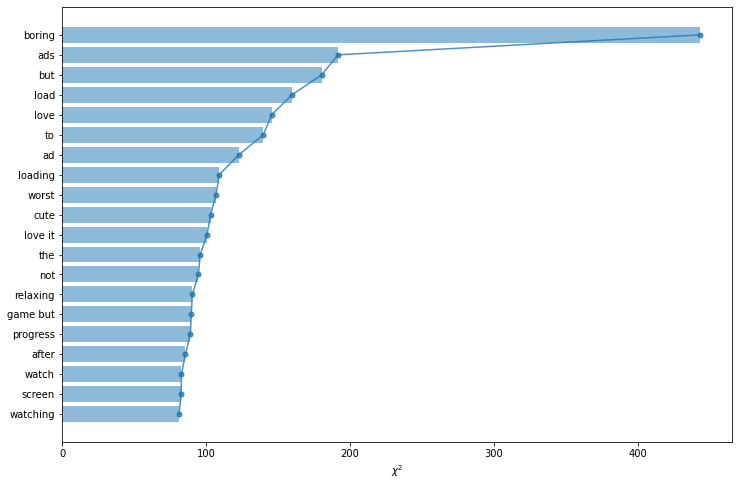

In [24]:
from sklearn.feature_selection import chi2

tfidf = TfidfVectorizer(max_features=30000,ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(df.content)
y = df.score
chi2score = chi2(X_tfidf, y)[0]

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
scores = list(zip(tfidf.get_feature_names(), chi2score))
chi2 = sorted(scores, key=lambda x:x[1])
topchi2 = list(zip(*chi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.5)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')
plt.show();
